In [1]:
%%html
<style>
.cell-output-ipywidget-background {
    background-color: transparent !important;
}
:root {
    --jp-widgets-color: var(--vscode-editor-foreground);
    --jp-widgets-font-size: var(--vscode-editor-font-size);
}  
</style>

In [2]:
import datetime
import pyaurorax

aurorax = pyaurorax.PyAuroraX()

# set up working with the tools by just making a shorter name for our future calls
at = aurorax.tools

In [3]:
# Download an hour of TREx Spectrograph data
dataset_name = "TREX_SPECT_PROCESSED_V1"
start_dt = datetime.datetime(2021, 2, 16, 9, 0)
end_dt = datetime.datetime(2021, 2, 16, 9, 59)
site_uid = "rabb"
r = aurorax.data.ucalgary.download(dataset_name, start_dt, end_dt, site_uid=site_uid)

# Read in the data
data = aurorax.data.ucalgary.read(r.dataset, r.filenames, n_parallel=5)

In [4]:
# Let's make a keogram with the spectrograph data. To do so, we
# pull out the spectrograph data array, timestamps, and wavelength
# array, and use the keogram.create function.

# Keograms must be created for specified emissions, as spectrograph data
# spectra across a large range of wavelengths.

# If no emission is specified, the function defaults to the greenline 
# emission (557.7 nm) for spectrograph data.
keo = at.keogram.create(data.data, data.timestamp, spectra=True, wavelength=data.metadata[0]['wavelength'])

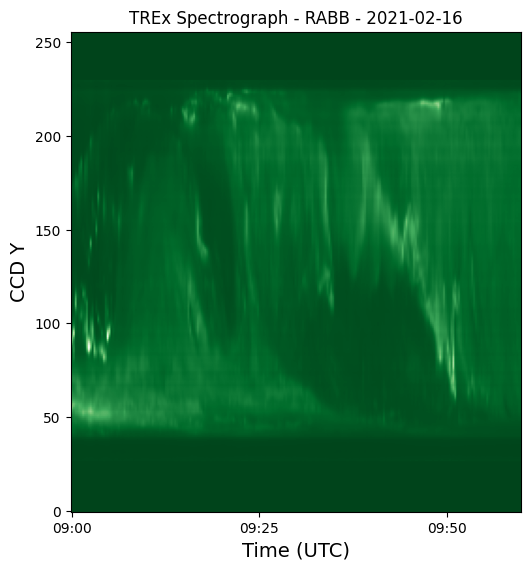

In [5]:
keo.plot(cmap='Greens_r', title=f"TREx Spectrograph - {site_uid.upper()} - {start_dt.date()}")

In [6]:
# Let's make four keograms, one for each of the available
# spect_emission options. To look at emissions that are not
# included, wavelength integration ranges for emissions and
# background subtraction can be passed using the spect_band
# and spect_band_bg parameters.

# Pull out the data to be used for all keograms
data_arr = data.data
timestamps = data.timestamp
wavelengths = data.metadata[0]['wavelength']

# Create the keograms for each emission

keo_hbeta = at.keogram.create(data_arr, timestamps, spectra=True,
                             wavelength=wavelengths, spect_emission='hbeta')

keo_4278 = at.keogram.create(data_arr, timestamps, spectra=True,
                             wavelength=wavelengths, spect_emission='blue')

keo_5577 = at.keogram.create(data_arr, timestamps, spectra=True,
                             wavelength=wavelengths, spect_emission='green')

keo_6300 = at.keogram.create(data_arr, timestamps, spectra=True,
                             wavelength=wavelengths, spect_emission='red')

In [7]:
import matplotlib.pyplot as plt

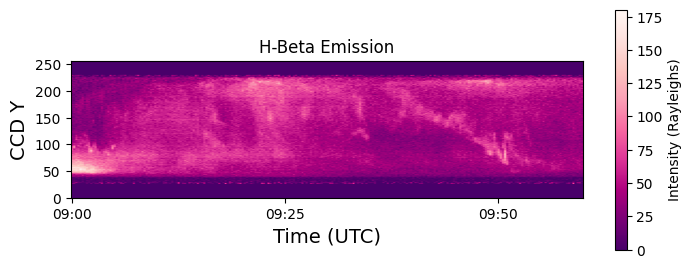

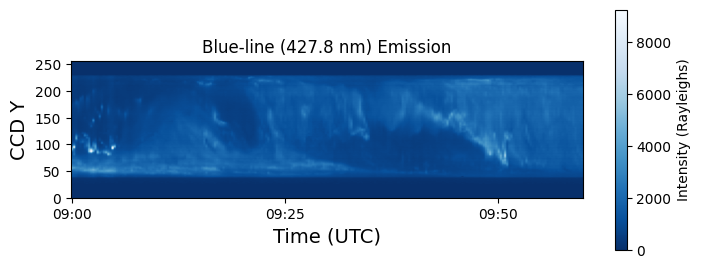

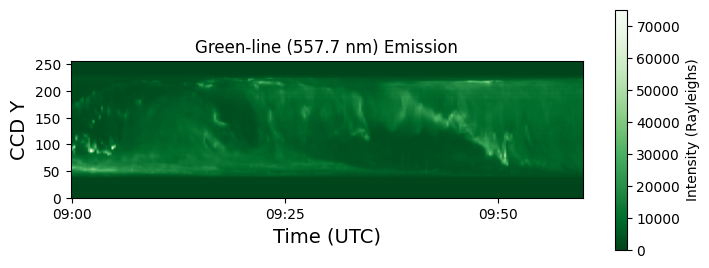

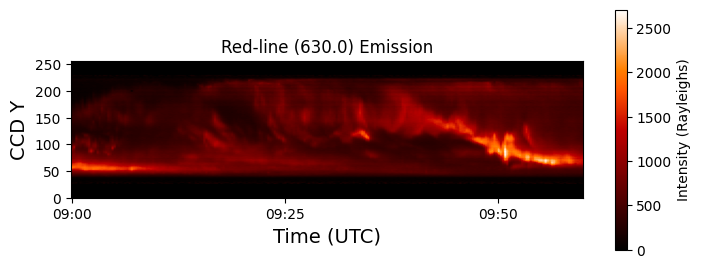

In [8]:
# Let's plot all 4 keograms

fig, ax = keo_hbeta.plot(cmap='RdPu_r', title=f"H-Beta Emission", aspect=0.25, returnfig=True)
colorbar = fig.colorbar(ax.images[0], ax=ax, shrink=0.5, label="Intensity (Rayleighs)")

fig, ax = keo_4278.plot(cmap='Blues_r', title=f"Blue-line (427.8 nm) Emission", aspect=0.25, returnfig=True)
colorbar = fig.colorbar(ax.images[0], ax=ax, shrink=0.5, label="Intensity (Rayleighs)")

fig, ax = keo_5577.plot(cmap='Greens_r', title=f"Green-line (557.7 nm) Emission", aspect=0.25, returnfig=True)
colorbar = fig.colorbar(ax.images[0], ax=ax, shrink=0.5, label="Intensity (Rayleighs)")

fig, ax = keo_6300.plot(cmap='gist_heat', title=f"Red-line (630.0) Emission", aspect=0.25, returnfig=True)
colorbar = fig.colorbar(ax.images[0], ax=ax, shrink=0.5, label="Intensity (Rayleighs)")

